restrict_Z

In [3]:
from astropy.io import fits

f_2d = 'jw06368004001_03101_00002_CLEAR-PRISM_s000039810_s2d.fits'
hdu = fits.open(f_2d)
hdu.info()


Filename: jw06368004001_03101_00002_CLEAR-PRISM_s000039810_s2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     377   ()      
  1  SCI           1 ImageHDU        89   (437, 30)   float32   
  2  ERR           1 ImageHDU        10   (437, 30)   float32   
  3  WAVELENGTH    1 ImageHDU         9   (437, 30)   float32   
  4  WHT           1 ImageHDU         9   (437, 30)   float32   
  5  CON           1 ImageHDU        10   (437, 30, 1)   int32   
  6  VAR_POISSON    1 ImageHDU         9   (437, 30)   float32   
  7  VAR_RNOISE    1 ImageHDU         9   (437, 30)   float32   
  8  VAR_FLAT      1 ImageHDU         9   (437, 30)   float32   
  9  HDRTAB        1 BinTableHDU    528   18R x 259C   [23A, 5A, 3A, 39A, 6A, 13A, 4A, 5A, 6A, 7A, 9A, 4A, L, D, D, 4A, 34A, 51A, 15A, 2A, 8A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 32A, 22A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 10A, 1A, 5A, D, D, D, D, D, D, D, D, 7A, 7A,

In [4]:
hdu[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  437                                                  
NAXIS2  =                   30                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =   60814.312919516895 / [d] exposure start time in MJD                 
MJD-AVG =   60814.430194145665 / [d] exposure mid-point in MJD                  
MJD-END =    60814.54782136574 / [d] exposure end time in MJD                   
TDB-BEG =   60814.314025116124 / [d] TDB time of exposure start in MJD          
TDB-MID =    60814.431288352

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
RA: 150.1335741, DEC: 2.2710158


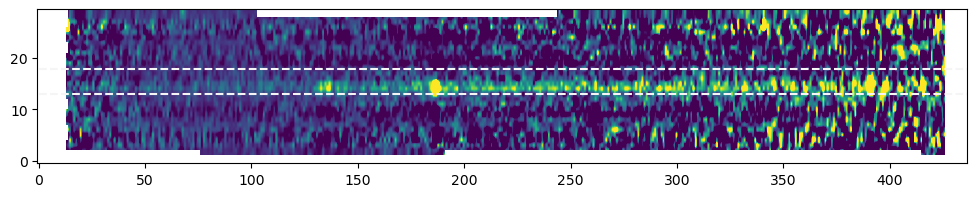

In [ ]:
data_2d = hdu[1].data
 
ra_spec, dec_spec = hdu[1].header['SRCRA'], hdu[1].header['SRCDEC']
print(f"RA: {ra_spec}, DEC: {dec_spec}")

from astropy.visualization import ImageNormalize, LinearStretch
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2))
plt.hlines(12.96, 0, 500, color='whitesmoke', linestyle='--')
plt.hlines(17.96, 0, 500, color='whitesmoke', linestyle='--')
ymax = 2 * np.nanpercentile(data_2d, 90) # adjust contrast
ymin = -0.2 * ymax
norm = ImageNormalize(vmin=ymin, vmax=ymax, stretch=LinearStretch())
plt.imshow(data_2d, origin='lower',aspect='auto', cmap='viridis', norm=norm)

In [6]:
'''from IPython.display import IFrame
pdf_url_sourceid = lambda sid: f"https://cosmos2025.iap.fr/fitsmap/data/inspec_plots/cosmos_web_sed_{sid}.pdf"

IFrame(pdf_url_sourceid(697852), width=1000, height=650)'''

'from IPython.display import IFrame\npdf_url_sourceid = lambda sid: f"https://cosmos2025.iap.fr/fitsmap/data/inspec_plots/cosmos_web_sed_{sid}.pdf"\n\nIFrame(pdf_url_sourceid(697852), width=1000, height=650)'

In [7]:
from astropy.io import fits

f_1d = 'jw06368004001_03101_00002_CLEAR-PRISM_s000039810_x1d.fits'
hdu1d = fits.open(f_1d)
hdu1d.info()

Filename: jw06368004001_03101_00002_CLEAR-PRISM_s000039810_x1d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     382   ()      
  1  EXTRACT1D     1 BinTableHDU     83   437R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  2  ASDF          1 BinTableHDU     11   1R x 1C   [20997B]   


<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6m/0z0t5x1j387f9wg4mm3vl0tm0000gn/T/ipykernel_7907/2759736923.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength [$\mu$m]')


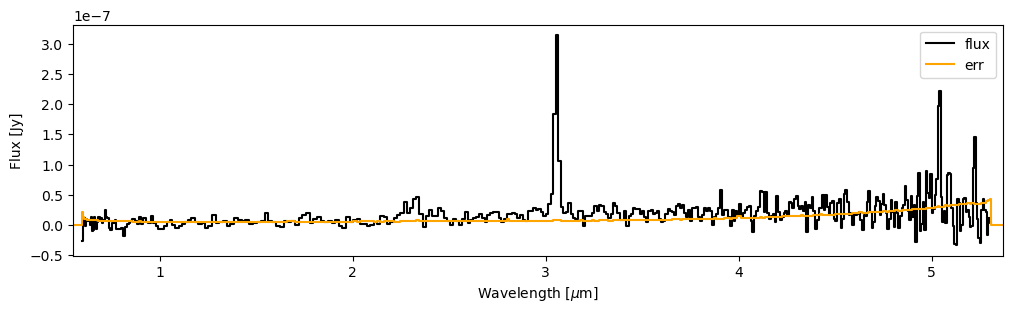

In [8]:
import matplotlib.pyplot as plt


data_1d = hdu1d[1].data
wave_1d = data_1d['WAVELENGTH'] #um
flux_1d = data_1d['FLUX'] #Jy 
fluxerr_1d = data_1d['FLUX_ERROR'] #Jy


plt.figure(figsize=[12,3])
plt.step(wave_1d, flux_1d, 'k', where='mid', label='flux')
plt.step(wave_1d,fluxerr_1d , 'orange', where='mid', label='err')
plt.xlim(wave_1d[0], wave_1d[-1])
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Flux [Jy]')
plt.legend()
plt.show()




<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6m/0z0t5x1j387f9wg4mm3vl0tm0000gn/T/ipykernel_7907/3931980364.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength [$\mu$m]')
/var/folders/6m/0z0t5x1j387f9wg4mm3vl0tm0000gn/T/ipykernel_7907/3931980364.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.step(wave_1d, flambda, 'k', where='mid', label='flux', color='royalblue')


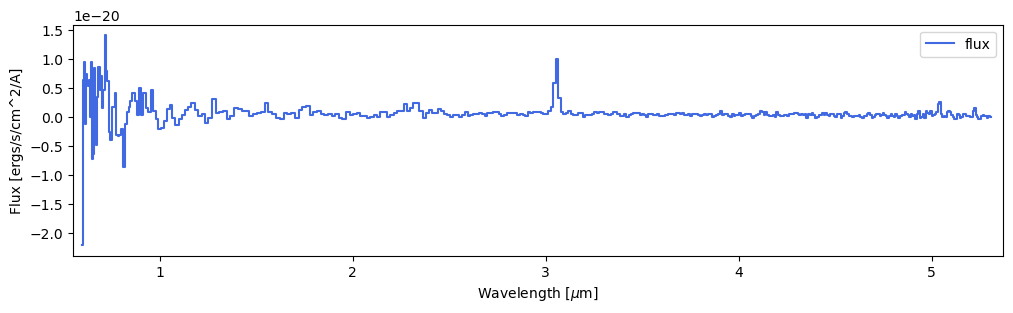

In [9]:
# Jy=10^−23 erg/s/cm^2/Hz

c = 2.99792458e14  # um/s

flambda = flux_1d * 1e-23 * (c*1e4) / (wave_1d * 1e4)**2
sigma = fluxerr_1d * 1e-23 * (c*1e4) / (wave_1d * 1e4)**2

import matplotlib.pyplot as plt


plt.figure(figsize=[12,3])
plt.step(wave_1d, flambda, 'k', where='mid', label='flux', color='royalblue')
plt.xlim(wave_1d[0], wave_1d[-1])
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Flux [ergs/s/cm^2/A]')
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6m/0z0t5x1j387f9wg4mm3vl0tm0000gn/T/ipykernel_7907/698150721.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength [$\mu$m]')
/var/folders/6m/0z0t5x1j387f9wg4mm3vl0tm0000gn/T/ipykernel_7907/698150721.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.step(wave_1d, flambda, 'k', where='mid', label='flux', color='royalblue')


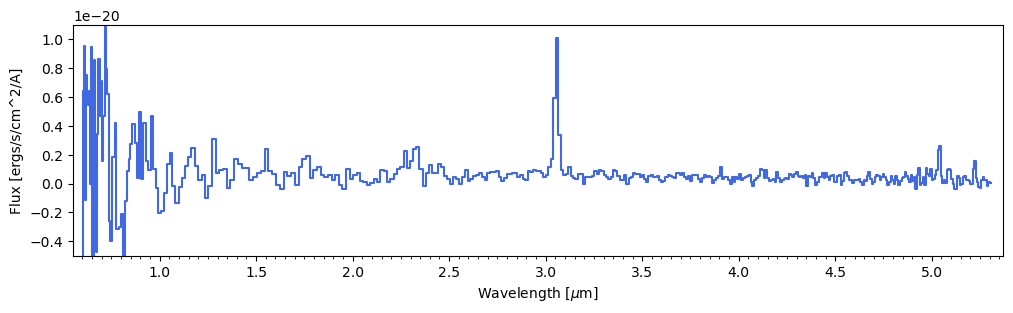

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

#continuum
plt.figure(figsize=[12,3])
plt.step(wave_1d, flambda, 'k', where='mid', label='flux', color='royalblue')
plt.xlim(wave_1d[0], wave_1d[-1])
plt.ylim(-0.5*1e-20, 1.1*1e-20)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Flux [ergs/s/cm^2/A]')

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

ax = plt.gca()  #gca is get current axes
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6m/0z0t5x1j387f9wg4mm3vl0tm0000gn/T/ipykernel_7907/3002363437.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength [$\mu$m]')
/var/folders/6m/0z0t5x1j387f9wg4mm3vl0tm0000gn/T/ipykernel_7907/3002363437.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.step(wave_1d, flambda, 'k', where='mid', label='flux', color='royalblue')


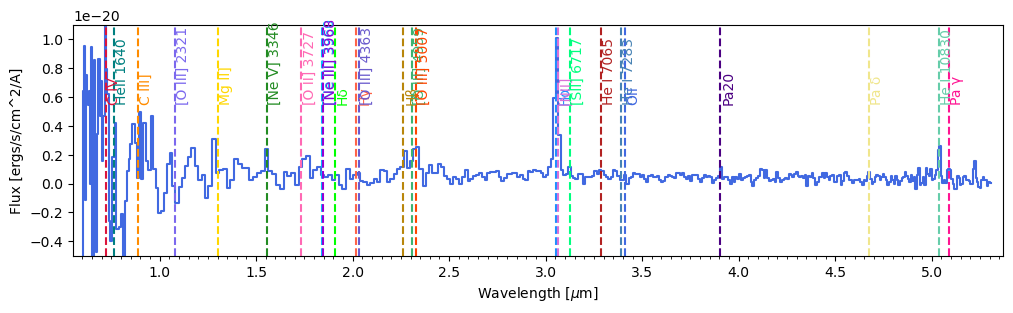

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

#continuum
plt.figure(figsize=[12,3])
plt.step(wave_1d, flambda, 'k', where='mid', label='flux', color='royalblue')
plt.xlim(wave_1d[0], wave_1d[-1])
plt.ylim(-0.5*1e-20, 1.1*1e-20)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Flux [ergs/s/cm^2/A]')

z = 3.654

y_top = plt.ylim()[1]

#emission lines
rest_ums = {
    #'Lyα': 0.1216,
    'C IV': 0.1548,
    'HeII 1640': 0.1640,
    'C III]': 0.1909,
    '[O III] 2321': 0.2321,

    'Mg II]': 0.2796,
    '[Ne V] 3346': 0.3346,
    '[O II] 3727': 0.3727,
    '[Ne III] 3960': 0.3960,
    '[Ne III] 3968': 0.3968,

    'Hδ': 0.4102,
    'Hγ': 0.4340,
    '[O III] 4363': 0.4363,
    'Hβ': 0.4861,
    '[O III] 4959': 0.4959,
    '[O III] 5007': 0.5007,

    'Hα': 0.6563,
    '[NII]': 0.6583,
    '[SII] 6717': 0.6716,
    'He I 7065': 0.7065,
    'He I 7283': 0.7283,

    'Pa20': 0.8392,
    'Pa δ': 1.0049,
    'He I 10830': 1.0830,
    'Pa γ': 1.0938,

    'OII': 0.7320,
    'OII': 0.7331,



}

#to observed wavelength
obs_ums = {name: wl * (1 + z) for name, wl in rest_ums.items()}

colors = [
    'crimson',       # red
    'teal',          # blue-green
    'darkorange',    # orange
    'mediumslateblue', # purplish blue
    'gold',          # yellow

    'forestgreen',   # green
    'hotpink',       # pink
    'deepskyblue',   # cyan
    'darkviolet',    # purple
    'lime',          # bright green

    'tomato',        # red-orange
    'slateblue',     # muted blue-purple
    'darkgoldenrod', # dark yellow
    'mediumseagreen',# sea green
    'orangered',     # intense red-orange

    'dodgerblue',    # electric blue
    'orchid',        # pinkish purple
    'springgreen',   # neon green
    'firebrick',     # brick red
    'steelblue',     # muted blue
    
    'indigo',        # dark blue-purple
    'khaki',         # beige yellow
    'mediumaquamarine', # aqua green
    'deeppink',          # vivid pink
    'royalblue',          # strong blue

    'tomato',
    'magenta'
]


for (line_name, wl_obs), color in zip(obs_ums.items(), colors):
    plt.axvline(wl_obs, color=color, linestyle='--')
    plt.text(wl_obs + 0.005, y_top * 0.5, line_name, color=color, rotation=90, va='bottom', fontsize=10)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

ax = plt.gca()  #gca is get current axes
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.show()


calculate hb ew, needed in classification for calibration nakajima. et al

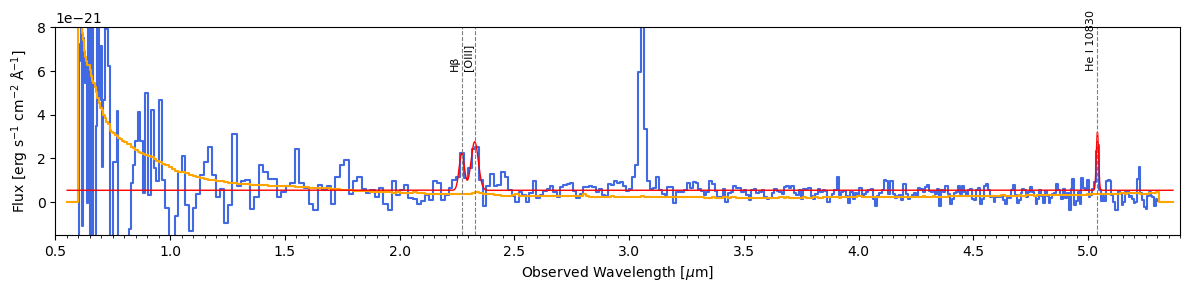

In [12]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

rest_ums = {
    'Hβ'         : 0.4861,
    #'[OIII] 4959': 0.4959,
    #'[OIII] 5007': 0.5007,
    '[OIII]' : 0.4983,
    'He I 10830': 1.0830
}

z = 3.654
obs_ums = {name: wl * (1 + z) for name, wl in rest_ums.items()}
line_names = list(obs_ums.keys())
line_centers = list(obs_ums.values())

wave_model = np.linspace(wave_1d.min(), wave_1d.max(), 10000) #create finer grid for gaussian modeling, separate grid from orig spectrum

def n_gaussian(x, amp1, mu1, sigma1,
                         amp2, mu2, sigma2,
                         amp3, mu3, sigma3,
                         offset):
    g1 = amp1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2)
    g2 = amp2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2)
    g3 = amp3 * np.exp(-0.5 * ((x - mu3) / sigma3)**2)
    return g1 + g2 + g3 + offset

#fitting window
min_wl = min(line_centers) - 0.05
max_wl = max(line_centers) + 0.05
window = (wave_1d >= min_wl) & (wave_1d <= max_wl)
x_fit = wave_1d[window]
y_fit = flambda[window]


continuum_sigma = sigma[window]
#initial guess: (amp, mu, sigma) *3 , offset
p0 = [
    1.5e-21, line_centers[0], 0.005,  #line1
    2e-21, line_centers[1], 0.005,  #line2
    0.3e-21, line_centers[2], 0.005,
    0.4e-21   # common offset value
    ]



# fit combined model in windows
popt, pcov = curve_fit(n_gaussian, x_fit, y_fit, absolute_sigma=True, sigma=continuum_sigma, p0=p0) 
#print(pcov)

#input 

# evaluate model over entire continuum
#fit_curve = n_gaussian(wave_1d, *popt) # !!reminder: wave_1d is all wavelengths of cont
#fit_curve = n_gaussian(wave_model, *popt)
fit_curve = n_gaussian(wave_model, *popt)





# plot!
plt.figure(figsize=(12,3))
plt.step(wave_1d, flambda, where='mid', color='royalblue') #orig continuum
plt.step(wave_1d,sigma, 'orange', where='mid', label='err')
plt.plot(wave_model, fit_curve, color='red', lw=1)

for i, name in enumerate(line_names):
    mu = popt[i * 3 + 1]
    plt.axvline(mu, linestyle='--', color='gray', lw=0.8)
    plt.text(mu - 0.05, 0.6e-20, name, rotation=90, va='bottom', ha='left', fontsize=8)

plt.xlabel('Observed Wavelength [$\\mu$m]')
plt.ylabel('Flux [erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')
#plt.title('')
#plt.ylim(-0.2e-20, 12e-21) with blended ha and nii
plt.ylim(-0.15*1e-20, 0.8*1e-20)
plt.xlim(0.5, 5.4)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.show()








In [13]:

'''
for i, name in enumerate(line_names):
    amp, mu, sigma = popt[i*3:i*3+3]
    print(f"{name:15s} | amplitude: {amp: .2e}    center={mu:.5f} µm    sigma={sigma:.5f} µm")
print(f"{'Continuum'} | offset={popt[-1]:.2e}")
'''


#calculate flux and uncertainties
import numpy as np
import uncertainties as unc

amp1, mu1, sigma1 = popt[0], popt[1], popt[2] #hb
amp2, mu2, sigma2 = popt[3], popt[4], popt[5] #OIII
amp3, mu3, sigma3 = popt[6], popt[7], popt[8] #ha


cont_fit = popt[9]


# Gaussian integral = a*sigma*sqrt(2pi)
def gaussian_flux(amp, sigma):
    return amp * (sigma * 1e4) * np.sqrt(2 * np.pi)


#unit of amp: erg/s/cm²/Å 
#unit of flux: erg/s/cm²

flux_Hb   = gaussian_flux(amp1, sigma1)
flux_OIII = gaussian_flux(amp2, sigma2)
flux_Hei = gaussian_flux(amp3, sigma3)

#print(pcov.shape)


#a_ha,sig_ha = popt_ha[0],popt_ha[2]
#mu_ha = popt_ha[1]  # in µm

#(amp, mu, sigma) *3 , offset


err_hb_amp = np.sqrt(pcov[0,0])
err_hb_sigma = np.sqrt(pcov[2,2])

err_o3_amp = np.sqrt(pcov[3,3])
err_o3_sigma = np.sqrt(pcov[5,5])

err_hei_amp = np.sqrt(pcov[6,6])
err_hei_sigma = np.sqrt(pcov[8,8])


a_hb = unc.ufloat(amp1, err_hb_amp)
sig_hb = unc.ufloat(sigma1, err_hb_sigma)

a_o3 = unc.ufloat(amp2, err_o3_amp)
sig_o3 = unc.ufloat(sigma2, err_o3_sigma)

a_hei = unc.ufloat(amp3, err_hei_amp)
sig_hei = unc.ufloat(sigma3, err_hei_sigma)

Hb_flux_unc = gaussian_flux(a_hb, sig_hb)
O3_flux_unc = gaussian_flux(a_o3, sig_o3)
Hei_flux_unc = gaussian_flux(a_hei, sig_hei)

R3 = (O3_flux_unc / Hb_flux_unc)

print('R3:', "{:.6u}".format(R3))

#ew calculation - flux/continuum 

err_continuum = np.sqrt(pcov[9,9])

cont_hb_unc = unc.ufloat(cont_fit, err_continuum)

ew_hb = (Hb_flux_unc/cont_hb_unc)/(1+z)

print('ew_Hb', "{:.6u}".format(ew_hb))
print()


# Print fluxes

print("Hβ Flux        =", "{:.5u}".format(Hb_flux_unc), "erg/s/cm²")
print("[OIII] Flux =", "{:.5u}".format(O3_flux_unc), "erg/s/cm²")
print("[HeI] Flux =", "{:.5u}".format(Hei_flux_unc), "erg/s/cm²")
print("[OIII]/Hβ Ratio =", "{:.5u}".format(R3))

#log(R)

from uncertainties.umath import log10

log_R3 = log10(R3)
logR3 = log_R3.nominal_value
logR3_unc = log_R3.std_dev

print()
print('logR3:', "{:.6u}".format(log_R3))

#solve calibration equation

from scipy.optimize import root_scalar

def solve_metallicity_from_logR(logR_value, coeffs, bracket=(-2.0, 2.0)):
    """
    **solving for x in calibration equation
    
    **(x_min, x_max) — range to search for the root (default covers metallicities from ~7.0 to 9.5)

    """

    # set to zero and find roots f(x) = calibration polynomial - logR_value = 0
    def poly_minus_logR(x):
        return np.polyval(coeffs[::-1], x) - logR_value
        # np.polyval expects highest degree first, so we reverse order of coeffs

    result = root_scalar(poly_minus_logR, method='brentq', bracket=bracket)

    return result.root

#coefficients in calibrations

Sanders_O3 = [0.834, -0.072, -0.453]
Nakajima_R3_large = [0.628, -0.660, -0.522]
Nakajima_R3_medium = [0.718, -0.297, -0.387]
Nakajima_R3_gen = [-0.277, -3.182, -2.832, -0.637]


x_sanders = solve_metallicity_from_logR(logR3, Sanders_O3, bracket=(-2.0, -0.2))
x_nakajima_large = solve_metallicity_from_logR(logR3, Nakajima_R3_large, bracket=(-2.0, -0.2))
x_nakajima_medium = solve_metallicity_from_logR(logR3, Nakajima_R3_medium, bracket=(-2.0, -0.2))
x_nakajima_gen = solve_metallicity_from_logR(logR3, Nakajima_R3_gen, bracket=(-2.2, -0.4))

Z_sanders = x_sanders+8
Z_nakajima_large = x_nakajima_large+8.69
Z_nakajima_medium = x_nakajima_medium+8.69
Z_nakajima_gen = x_nakajima_gen+8.69

print()

print('x_calibrations:\n', 'sanders', x_sanders, '\n', 'nakajima_large', x_nakajima_large, '\n', 
      'nakajima_medium', x_nakajima_medium, '\n', 'nakajima_gen', x_nakajima_gen)

print('Z_calibrations:\n', 'sanders: 12+log(O/H)=', Z_sanders, '\n', 'nakajima_large: 12+log(O/H)=', Z_nakajima_large, '\n', 
      'nakajima_medium: 12+log(O/H)=', Z_nakajima_medium, '\n', 'nakajima_gen: 12+log(O/H)=', Z_nakajima_gen)


#------------------------------error propagation------------------------------

def compute_dfdx(x, coeffs):

    dfdx = sum(n * c * x**(n - 1) for n, c in enumerate(coeffs) if n > 0)

    return dfdx

def propagate_error_x(sigma_logR, x, coeffs):
    """
    Propagates uncertainty in logR through the calibration to get uncertainty in x.

    Parameters:
    - sigma_logR: uncertainty in log([OIII]/Hβ)
    - x: the solution to the polynomial (metallicity relative to solar)
    - coeffs: list of calibration coefficients

    Returns:
    - sigma_x: propagated uncertainty in x
    """
    dfdx = compute_dfdx(x, coeffs)

    sigma_x = sigma_logR / abs(dfdx)
    return sigma_x

sigma_x_sanders = propagate_error_x(logR3_unc, x_sanders, Sanders_O3)
sigma_x_nakajima_large = propagate_error_x(logR3_unc, x_nakajima_large, Nakajima_R3_large)
sigma_x_nakajima_medium = propagate_error_x(logR3_unc, x_nakajima_medium, Nakajima_R3_medium)
sigma_x_nakajima_gen = propagate_error_x(logR3_unc, x_nakajima_gen, Nakajima_R3_gen)


print()
print('Z_nominal_values: nakajima_gen; nakajima_large; nakajima_medium; sanders')
print(Z_nakajima_gen, Z_nakajima_large, Z_nakajima_medium, Z_sanders)
print()
print('uncertainties: nakajima_gen; nakajima_large; nakajima_medium; sanders')
print(sigma_x_nakajima_gen, sigma_x_nakajima_large, sigma_x_nakajima_medium, sigma_x_sanders)
print()

Z_nakajima_gen_unc = unc.ufloat(Z_nakajima_gen, sigma_x_nakajima_gen)
Z_nakajima_large_unc = unc.ufloat(Z_nakajima_large, sigma_x_nakajima_large)
Z_nakajima_medium_unc = unc.ufloat(Z_nakajima_medium, sigma_x_nakajima_medium)
Z_sanders_unc = unc.ufloat(Z_sanders, sigma_x_sanders)

print('12+log(O/H): nakajima_gen; nakajima_large; nakajima_medium; sanders')

print("{:.6u}".format(Z_nakajima_gen_unc), "{:.6u}".format(Z_nakajima_large_unc), "{:.6u}".format(Z_nakajima_medium_unc), "{:.6u}".format(Z_sanders_unc))


R3: 1.816363+/-0.756328
ew_Hb 194.7593+/-62.6162

Hβ Flux        = (4.8430+/-1.5511)e-19 erg/s/cm²
[OIII] Flux = (8.7966+/-2.3408)e-19 erg/s/cm²
[HeI] Flux = (3.2313+/-1.2887)e-19 erg/s/cm²
[OIII]/Hβ Ratio = 1.81636+/-0.75633

logR3: 0.259203+/-0.180839

x_calibrations:
 sanders -1.208710502142868 
 nakajima_large -1.6839275449828925 
 nakajima_medium -1.5381750953766808 
 nakajima_gen -1.514475161925808
Z_calibrations:
 sanders: 12+log(O/H)= 6.791289497857132 
 nakajima_large: 12+log(O/H)= 7.006072455017107 
 nakajima_medium: 12+log(O/H)= 7.151824904623319 
 nakajima_gen: 12+log(O/H)= 7.175524838074192

Z_nominal_values: nakajima_gen; nakajima_large; nakajima_medium; sanders
7.175524838074192 7.006072455017107 7.151824904623319 6.791289497857132

uncertainties: nakajima_gen; nakajima_large; nakajima_medium; sanders
0.17854446611615615 0.1646954033634662 0.20238308626021306 0.17675727693829285

12+log(O/H): nakajima_gen; nakajima_large; nakajima_medium; sanders
7.175525+/-0.178544 7.00

In [14]:
print(R3)

1.8+/-0.8


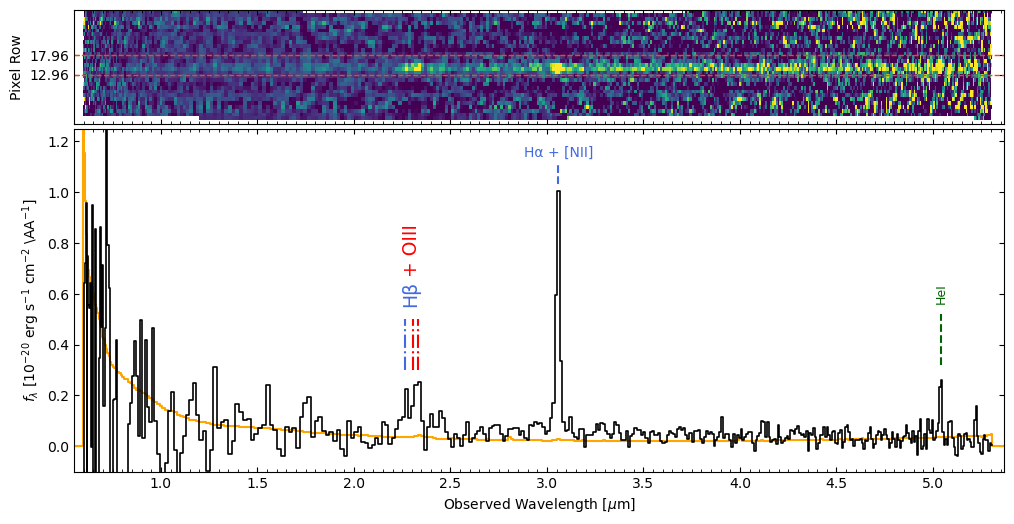

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from astropy.visualization import ImageNormalize, LinearStretch


ymax = 2 * np.nanpercentile(data_2d, 90)
ymin = -0.2 * ymax
norm = ImageNormalize(vmin=ymin, vmax=ymax, stretch=LinearStretch())

ny, nx = data_2d.shape

# If columns of the 2D array correspond 1:1 to wave_1d samples, use wavelength on x
'''if len(wave_1d) == nx:
    x_min, x_max = wave_1d[0], wave_1d[-1]
    extent = [x_min, x_max, 0, ny-1]
    sharex = True
else:
    extent = [0, nx-1, 0, ny-1]
    sharex = False'''

extent = [wave_1d.min(), wave_1d.max(), 0, ny]

fig, (ax2d, ax1d) = plt.subplots(
    2, 1, figsize=(12, 6),
    height_ratios=[1, 3],
    sharex=True
)
plt.subplots_adjust(hspace=0.02)

'''
im = ax2d.imshow(
    data_2d, origin='lower', aspect='auto',
    cmap='viridis', norm=norm, extent=extent
)
'''

# Build wavelength bin edges from wave_1d
ny, nx = data_2d.shape
w_edges = np.empty(nx + 1, dtype=float)
w_edges[1:-1] = 0.5 * (wave_1d[1:] + wave_1d[:-1])
w_edges[0]  = wave_1d[0]  - (w_edges[1]   - wave_1d[0])
w_edges[-1] = wave_1d[-1] + (wave_1d[-1]  - w_edges[-2])
y_edges = np.arange(ny + 1)

# Plot the 2D spectrum with correct wavelength scale
ax2d.pcolormesh(
    w_edges, y_edges, data_2d,
    shading='auto', cmap='viridis', norm=norm
)


# guide lines
ax2d.hlines([12.96, 17.96], xmin=extent[0], xmax=extent[1],
            colors='orangered', linestyles='--', linewidths=1)

ax2d.set_ylabel("Pixel Row")
#ax2d.set_yticks([0, (ny-1)/2., ny-1])
ax2d.set_yticks([12.96,17.96])

# ticks: inward on all sides; hide bottom ticks/labels on 2D panel
ax2d.tick_params(direction='in', which='both', top=True, right=True)
ax2d.tick_params(axis='x', which='both', bottom=True, labelbottom=False)

# Scale flux
flambda_scaled = flambda * 1e20
sigma_scaled = sigma * 1e20

ax1d.step(wave_1d, sigma_scaled, 'orange', where='mid', label='err')
ax1d.step(wave_1d, flambda_scaled, 'black',where='mid', label='Flux', linewidth=1.2)


ax1d.set_xlim(wave_1d[0], wave_1d[-1])
ax1d.set_ylim(-0.1, 1.25) 
ax1d.set_xlabel(r'Observed Wavelength [$\mu$m]')
ax1d.set_ylabel(r'$f_\lambda$ [$10^{-20}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$]')

# ticks: inward on all sides; also show top/right ticks
ax1d.tick_params(direction='in', which='both', top=True, right=True)

ax1d.xaxis.set_major_locator(MultipleLocator(0.5))
ax1d.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1d.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#plot lines
def to_obs_um(rest_um):
    obs_um = rest_um * (1+3.654)
    return obs_um

hb_obs_um = to_obs_um(0.4861)
o3_obs_um = to_obs_um(0.4983)
ha_obs_um = to_obs_um(0.6573)

lines_A = [ha_obs_um]
line_names_A = ['Hα + [NII]']
lines_A_ymin = [1.03]
lines_A_ymax = [1.11]

hei_obs_um = to_obs_um(1.0830)
pa20_obs_um = to_obs_um(0.8392)
nev_obs_um = to_obs_um(0.3346)

#paδ_obs_um = to_obs_um(1.0049)
#paγ_obs_um = to_obs_um(1.0938)

'''lines_B = [hei_obs_um, pa20_obs_um, nev_obs_um]
line_names_B = ["HeI", "Pa20", "[NeV]"]
lines_B_ymin = [0.32, 0.17, 0.3]
lines_B_ymax = [0.52,0.37,0.5]
'''

lines_B = [hei_obs_um]
line_names_B = ["HeI"]
lines_B_ymin = [0.32]
lines_B_ymax = [0.52]


for i, xpos in enumerate(lines_A):
    ax1d.vlines(
        xpos, ymin=lines_A_ymin[i], ymax=lines_A_ymax[i], color='royalblue', linestyle='--'
    )
    ax1d.text(
        xpos, lines_A_ymax[i] + 0.02, line_names_A[i], color='royalblue', fontsize=10, ha='center', va='bottom', rotation=0
    )

for i, xpos in enumerate(lines_B):
    ax1d.vlines(
        xpos, ymin=lines_B_ymin[i], ymax=lines_B_ymax[i],
        color='darkgreen', linestyle='--'
    )
    ax1d.text(
        xpos, lines_B_ymax[i] + 0.04, line_names_B[i],
        color='darkgreen', fontsize=9, ha='center', va='bottom', rotation=90
    )

o3_4959_obs_um = to_obs_um(0.4959)
o3_5007_obs_um = to_obs_um(0.5007)

ax1d.vlines(hb_obs_um, ymin=0.3, ymax=0.5, color='royalblue', linestyle='-.')
ax1d.vlines(o3_4959_obs_um, ymin=0.3, ymax=0.5, color='red', linestyle='-.')
ax1d.vlines(o3_5007_obs_um, ymin=0.3, ymax=0.5, color='red', linestyle='-.')
ax1d.text((o3_5007_obs_um-hb_obs_um)/2+hb_obs_um, 0.5+0.05, 'Hβ', color='royalblue', rotation=90, va='bottom', ha='center', fontsize=13.5)
ax1d.text((o3_5007_obs_um-hb_obs_um)/2+hb_obs_um, 0.5+0.145, ' + OIII', color='red', rotation=90, va='bottom', ha='center', fontsize=13.5)



plt.show()
